In [1]:
import os
import time

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

In [2]:
data_path = os.path.join('../in/TIF')
courses_fn = 'course.csv'
scores_fn = 'main.csv'
students_fn = 'student.csv'

In [20]:
df_courses = pd.read_csv(
    os.path.join(data_path, courses_fn),
    usecols=['CourseCode', 'CourseName', 'Credit', 'CourseType'],
    dtype={'CourseCode': 'str', 'CourseName': 'str', 'Credit': 'int32', 'CourseType': 'str'})

df_scores = pd.read_csv(
    os.path.join(data_path, scores_fn),
    usecols=['TermCode', 'ID', 'CourseCode', 'GradePts', 'Term'],
    dtype={'TermCode': 'int32', 'ID': 'str', 'CourseCode': 'str', 'GradePts': 'float32', 'Term': 'str'})

df_students = pd.read_csv(
    os.path.join(data_path, students_fn),
    usecols=['ID', 'Cohort', 'Major'],
    dtype={'ID': 'str', 'Cohort': 'int32', 'Major': 'str'})

In [4]:
df_courses.head()

,CourseCode,CourseName,Credit,CourseType
0,FLA0011,ACADEMIC WRITING,2,FLA
1,INF0011,ALGORITMA & PEMROGRAMAN,4,NaN
2,INF0021,ALJABAR LINIER & MATRIKS,2,NaN
3,INF0022,ALJABAR LINIER & MATRIKS,3,NaN
4,INF0031,ANALISIS ALGORITMA,2,NaN


In [5]:
df_scores.head()

,ID,CourseCode,GradePts,TermCode
0,S001,INF0132,1.0,20121
1,S001,INF0221,2.3,20121
2,S001,INF0111,2.0,20121
3,S001,INF0371,3.3,20121
4,S002,INF0132,1.0,20121


In [6]:
df_students.head()

,ID,Cohort,Major
0,S001,2012,MI
1,S002,2012,SE
2,S003,2012,MI
3,S004,2012,MI
4,S005,2012,MI


In [7]:
n_students = len(df_scores.ID.unique())
n_students_ch = len(df_students.ID.unique())
n_courses = len(df_scores.CourseCode.unique()) # minus course FLA
n_courses_ch = len(df_courses.CourseCode.unique())

print('Unique students: {} / {}'.format(n_students, n_students_ch))
print('Unique courses: {} / {}'.format(n_courses, n_courses_ch))

Unique students: 89 / 89
Unique courses: 75 / 90


In [8]:
df_scores_cnt_gr = pd.DataFrame(df_scores.groupby('GradePts').size(), columns=['count'])
df_scores_cnt_gr

,count
GradePts,
0.0,239
1.0,83
1.7,251
2.0,312
2.3,410
2.7,482
3.0,527
3.3,484
3.7,362


In [9]:
df_scores_cnt_id = pd.DataFrame(df_scores.groupby('ID').size(), columns=['count'])
df_scores_cnt_id

,count
ID,
S001,35
S002,40
S003,36
S004,40
S005,38
S006,36
S007,38
S008,36
S009,56


In [10]:
df_scores_cnt_cc = pd.DataFrame(df_scores.groupby('CourseCode').size(), columns=['count'])
df_scores_cnt_cc

,count
CourseCode,
INF0011,129
INF0021,41
INF0022,71
INF0031,90
INF0041,24
INF0051,20
INF0052,11
INF0061,53
INF0071,31


In [11]:
df_scores_cnt_tm = pd.DataFrame(df_scores.groupby('TermCode').size(), columns=['count'])
df_scores_cnt_tm

,count
TermCode,
20121,32
20122,43
20123,9
20131,88
20132,90
20133,111
20141,186
20142,172
20143,185


Text(0, 0.5, 'number of scores')

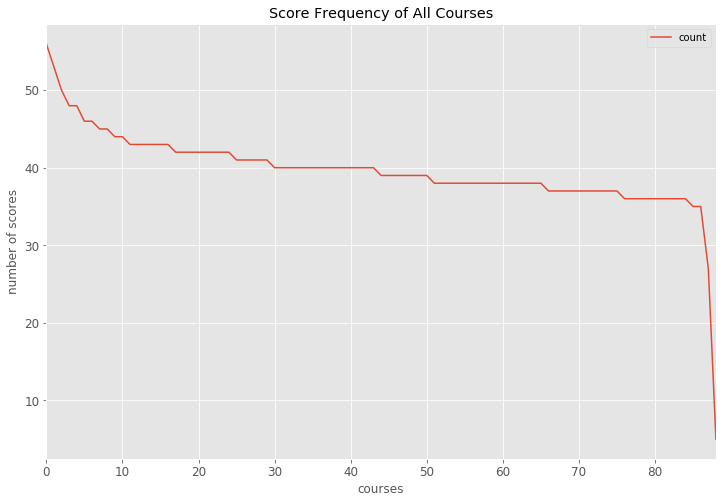

In [12]:
ax = df_scores_cnt_id \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(12, 8),
        title='Score Frequency of All Courses',
        fontsize=12
    )
ax.set_xlabel("courses")
ax.set_ylabel("number of scores")

(Record, Column): (38, 5)


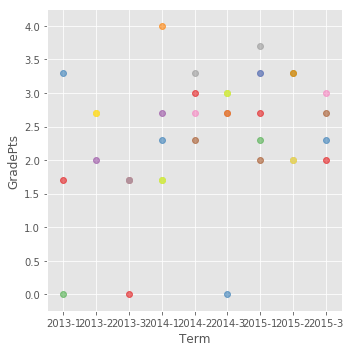

In [53]:
df_scores_partition = df_scores[df_scores.ID == 'S010']

sns.lmplot( x="Term", y="GradePts", data=df_scores_partition, hue="CourseCode", fit_reg=False, legend=False, palette="Set1", scatter_kws={'alpha':0.6})

print('(Record, Column): {}' .format(df_scores_partition.shape))